In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

C:\Users\user\Miniconda3\envs\jcopml\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv("data/Ritz_Jager_Data.csv")
df.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
def plot_null_values(data, return_df=True):
    
    null_summary = data.isnull().sum()
    print(null_summary[null_summary > 0].sort_values(ascending=False)) if return_df else None

    plt.figure(figsize=(12, 8))
    sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False, cbar=False)

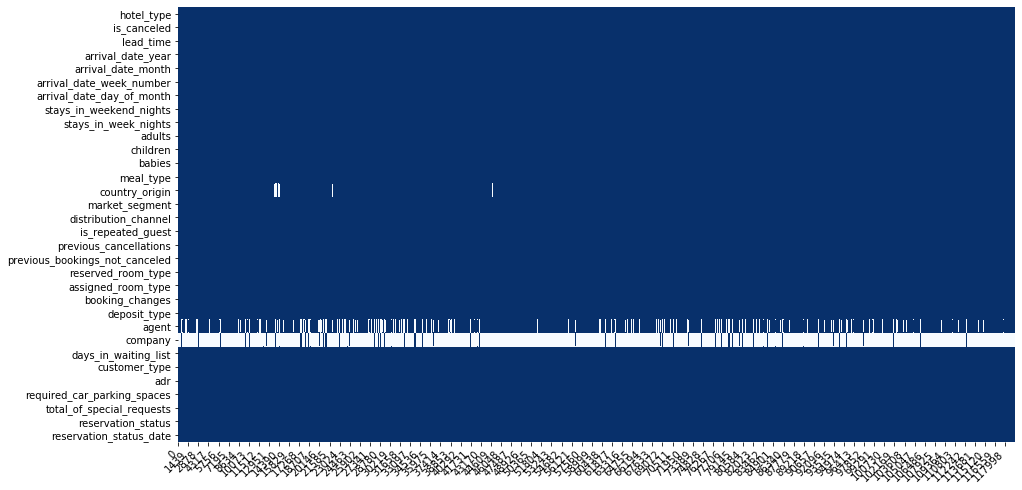

In [4]:
plot_missing_value(df)

In [5]:
df.shape

(119390, 32)

In [6]:
df.isnull().sum()

hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal_type                              0
country_origin                       488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Series([], dtype: int64)
(86914, 30)


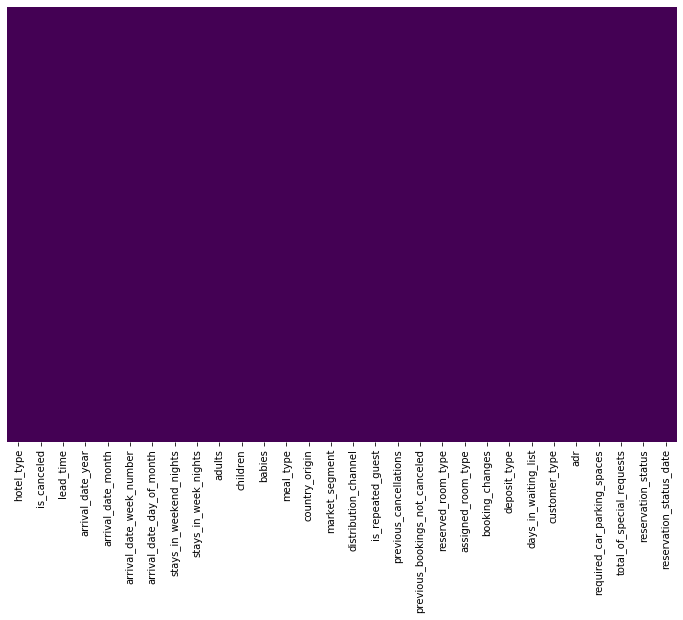

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# drop unused columns
df.drop(columns = ['agent', 'company'], inplace = True)

#null values treatment
df.dropna(inplace = True)

#drop duplicate
df.drop_duplicates(inplace = True)

plot_null_values(df)
print(df.shape)

In [8]:
df.shape

(86914, 30)

In [9]:
pd.options.display.max_columns = 100
df.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,3/7/2015


# 1. Where do the guests come from?

In [82]:
df.country_origin.value_counts()

PRT    27436
GBR    10431
FRA     8837
ESP     7250
DEU     5385
       ...  
NCL        1
CYM        1
GUY        1
PLW        1
PYF        1
Name: country_origin, Length: 177, dtype: int64

In [11]:
country_booked = df[(df['is_canceled'] == 0)][['country_origin']]

In [12]:
country_booked.country_origin.value_counts()

PRT    17653
GBR     8446
FRA     7104
ESP     5388
DEU     4332
       ...  
ATF        1
AIA        1
DMA        1
ASM        1
PYF        1
Name: country_origin, Length: 165, dtype: int64

In [83]:
country_canceled = df[(df['is_canceled'] == 1)][['country_origin']]

In [84]:
country_canceled.country_origin.value_counts()

PRT    9783
GBR    1985
ESP    1862
FRA    1733
ITA    1075
       ... 
ZMB       1
NIC       1
KHM       1
UMI       1
GLP       1
Name: country_origin, Length: 127, dtype: int64

In [86]:
pd.pivot_table(df, index = ['country_origin'], columns = ['hotel_type'], aggfunc = {'country_origin': len}, fill_value = 0)

country_origin             
hotel_type         City Hotel Resort Hotel
country_origin                            
ABW                         2            0
AGO                       319           23
AIA                         1            0
ALB                         8            3
AND                         2            5
...                       ...          ...
VGB                         1            0
VNM                         6            2
ZAF                        60           18
ZMB                         1            1
ZWE                         2            2

[177 rows x 2 columns]

# 2. How much do guests pay for a room per night?

In [16]:
df2 = df.copy()

In [17]:
df2['total_staying'] = df['stays_in_weekend_nights']+ df['stays_in_week_nights']

In [18]:
df2['sum_transactions'] = df2['total_staying'] * df['adr']

In [19]:
df2[['sum_transactions']].describe()

,sum_transactions
count,86914.000000
mean,395.325362
std,368.003555
min,-63.800000
25%,154.000000
50%,299.200000
75%,504.000000
max,6300.000000


In [20]:
price_adult = df2[(df2['adults'] == 1) 
                  & (df2['children'] == 0.0) 
                  & (df2['babies'] == 0.0) 
                  & (df2['total_staying'] == 1.0)
                  & (df2['hotel_type'] == 'City Hotel')][['babies', 'children', 'adr', 'total_staying', 'sum_transactions']]

In [21]:
price_adult.adr.value_counts()

65.00     366
0.00      217
95.00     205
80.00     124
67.00     116
         ... 
124.50      1
117.80      1
92.70       1
161.88      1
103.18      1
Name: adr, Length: 443, dtype: int64

In [87]:
price_adult.describe()

,babies,children,adr,total_staying,sum_transactions
count,3653.0,3653.0,3653.000000,3653.0,3653.000000
mean,0.0,0.0,91.209187,1.0,91.209187
std,0.0,0.0,39.729389,0.0,39.729389
min,0.0,0.0,0.000000,1.0,0.000000
25%,0.0,0.0,67.000000,1.0,67.000000
50%,0.0,0.0,89.000000,1.0,89.000000
75%,0.0,0.0,110.000000,1.0,110.000000
max,0.0,0.0,510.000000,1.0,510.000000


In [22]:
price_adult_resort = df2[(df2['adults'] == 1) 
                  & (df2['children'] == 0.0) 
                  & (df2['babies'] == 0.0) 
                  & (df2['total_staying'] == 1.0)
                  & (df2['hotel_type'] == 'Resort Hotel')][['babies', 'children', 'adr', 'total_staying', 'sum_transactions']]

In [23]:
price_adult_resort.adr.value_counts()

35.00    180
30.00    133
39.00    122
43.00    122
40.00    117
        ... 
59.20      1
38.40      1
31.45      1
65.20      1
66.40      1
Name: adr, Length: 271, dtype: int64

In [88]:
price_adult_resort.describe()

,babies,children,adr,total_staying,sum_transactions
count,2373.0,2373.0,2373.000000,2373.0,2373.000000
mean,0.0,0.0,53.639899,1.0,53.639899
std,0.0,0.0,30.028637,0.0,30.028637
min,0.0,0.0,0.000000,1.0,0.000000
25%,0.0,0.0,36.000000,1.0,36.000000
50%,0.0,0.0,43.000000,1.0,43.000000
75%,0.0,0.0,63.000000,1.0,63.000000
max,0.0,0.0,215.000000,1.0,215.000000


In [89]:
price_adult_city = df2[(df2['adults'] == 1) 
                  & (df2['children'] == 0.0) 
                  & (df2['babies'] == 0.0) 
                  & (df2['total_staying'] == 1.0)
                  & (df2['hotel_type'] == 'City Hotel')][['babies', 'children', 'adr', 'total_staying', 'sum_transactions']]

In [90]:
price_adult_city.describe()

,babies,children,adr,total_staying,sum_transactions
count,3653.0,3653.0,3653.000000,3653.0,3653.000000
mean,0.0,0.0,91.209187,1.0,91.209187
std,0.0,0.0,39.729389,0.0,39.729389
min,0.0,0.0,0.000000,1.0,0.000000
25%,0.0,0.0,67.000000,1.0,67.000000
50%,0.0,0.0,89.000000,1.0,89.000000
75%,0.0,0.0,110.000000,1.0,110.000000
max,0.0,0.0,510.000000,1.0,510.000000


In [24]:
price_child = df2[(df2['children'] == 1.0) 
                  & (df2['total_staying'] == 1)][['babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [91]:
price_child.describe()

,babies,adults,adr,total_staying,sum_transactions
count,699.000000,699.000000,699.000000,699.0,699.000000
mean,0.035765,2.051502,133.762632,1.0,133.762632
std,0.207682,0.393620,53.467197,0.0,53.467197
min,0.000000,1.000000,0.000000,1.0,0.000000
25%,0.000000,2.000000,107.015000,1.0,107.015000
50%,0.000000,2.000000,131.000000,1.0,131.000000
75%,0.000000,2.000000,162.000000,1.0,162.000000
max,2.000000,3.000000,359.000000,1.0,359.000000


In [95]:
price_child_resort = df2[(df2['children'] == 1.0) 
                  & (df2['total_staying'] == 1)
                  & (df2['hotel_type'] == 'Resort Hotel')][['babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [96]:
price_child_resort.describe()

,babies,adults,adr,total_staying,sum_transactions
count,219.000000,219.000000,219.000000,219.0,219.000000
mean,0.041096,2.242009,127.731233,1.0,127.731233
std,0.198967,0.498500,67.797225,0.0,67.797225
min,0.000000,1.000000,0.000000,1.0,0.000000
25%,0.000000,2.000000,75.000000,1.0,75.000000
50%,0.000000,2.000000,118.000000,1.0,118.000000
75%,0.000000,3.000000,171.050000,1.0,171.050000
max,1.000000,3.000000,359.000000,1.0,359.000000


In [97]:
price_child_city = df2[(df2['children'] == 1.0) 
                  & (df2['total_staying'] == 1)
                  & (df2['hotel_type'] == 'City Hotel')][['babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [99]:
price_child_city.describe()

,babies,adults,adr,total_staying,sum_transactions
count,480.000000,480.000000,480.000000,480.0,480.000000
mean,0.033333,1.964583,136.514458,1.0,136.514458
std,0.211697,0.297512,45.272790,0.0,45.272790
min,0.000000,1.000000,0.000000,1.0,0.000000
25%,0.000000,2.000000,115.000000,1.0,115.000000
50%,0.000000,2.000000,134.100000,1.0,134.100000
75%,0.000000,2.000000,160.000000,1.0,160.000000
max,2.000000,3.000000,285.000000,1.0,285.000000


In [100]:
price_babies = df2[(df2['babies'] == 1.0) 
                   & (df2['total_staying'] == 1)][['babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [101]:
price_babies.describe()

,babies,adults,adr,total_staying,sum_transactions
count,140.0,140.000000,140.000000,140.0,140.000000
mean,1.0,1.978571,103.511571,1.0,103.511571
std,0.0,0.280489,65.326346,0.0,65.326346
min,1.0,0.000000,0.000000,1.0,0.000000
25%,1.0,2.000000,57.750000,1.0,57.750000
50%,1.0,2.000000,89.100000,1.0,89.100000
75%,1.0,2.000000,151.650000,1.0,151.650000
max,1.0,3.000000,305.000000,1.0,305.000000


In [102]:
price_baby_city = df2[(df2['babies'] == 1.0) 
                  & (df2['total_staying'] == 1)
                  & (df2['hotel_type'] == 'City Hotel')][['babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [104]:
price_baby_city.describe()

,babies,adults,adr,total_staying,sum_transactions
count,82.0,82.000000,82.000000,82.0,82.000000
mean,1.0,1.963415,120.466951,1.0,120.466951
std,0.0,0.331295,68.621100,0.0,68.621100
min,1.0,0.000000,0.000000,1.0,0.000000
25%,1.0,2.000000,80.187500,1.0,80.187500
50%,1.0,2.000000,119.000000,1.0,119.000000
75%,1.0,2.000000,159.750000,1.0,159.750000
max,1.0,3.000000,305.000000,1.0,305.000000


In [105]:
price_baby_resort = df2[(df2['babies'] == 1.0) 
                  & (df2['total_staying'] == 1)
                  & (df2['hotel_type'] == 'Resort Hotel')][['babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [107]:
price_baby_resort.describe()

,babies,adults,adr,total_staying,sum_transactions
count,58.0,58.000000,58.000000,58.0,58.000000
mean,1.0,2.000000,79.540172,1.0,79.540172
std,0.0,0.187317,52.124582,0.0,52.124582
min,1.0,1.000000,0.000000,1.0,0.000000
25%,1.0,2.000000,46.400000,1.0,46.400000
50%,1.0,2.000000,65.000000,1.0,65.000000
75%,1.0,2.000000,92.250000,1.0,92.250000
max,1.0,3.000000,199.000000,1.0,199.000000


# How does the price per night vary over the year?

In [28]:
df2['reservation_status_date'] = pd.to_datetime(df.reservation_status_date)

In [29]:
df2['reservation_year'] = df2['reservation_status_date'].dt.year
df2['reservation_month'] = df2['reservation_status_date'].dt.month
df2['reservation_day'] = df2['reservation_status_date'].dt.day
df2.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal_type,country_origin,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_staying,sum_transactions,reservation_year,reservation_month,reservation_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,0,0.0,2015,1,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-01-07,0,0.0,2015,1,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,1,75.0,2015,2,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-02-07,1,75.0,2015,2,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-03-07,2,196.0,2015,3,7


In [30]:
df2.reservation_year.value_counts()

2016    43654
2017    29819
2015    13429
2014       12
Name: reservation_year, dtype: int64

## Price 2015

### Price for Adult

In [129]:
price_2015 = df2[(df2['adults'] == 0) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['arrival_date_year'] == 2015) &
                (df2['hotel_type'] == 'Resort Hotel')][['adults','babies', 'children', 'adr', 'total_staying', 'hotel_type']]

In [131]:
price_2015.adr.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: adr, dtype: float64

In [112]:
price_2015_resort = df2[(df2['adults'] == 1) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['arrival_date_year'] == 2015) &
                (df2['hotel_type'] == 'Resort Hotel')][['adults','babies', 'children', 'adr', 'total_staying', 'hotel_type']]

In [113]:
price_2015_resort.describe()

,adults,babies,children,adr,total_staying
count,382.0,382.0,382.0,382.000000,382.0
mean,1.0,0.0,0.0,49.788508,1.0
std,0.0,0.0,0.0,31.485066,0.0
min,1.0,0.0,0.0,0.000000,1.0
25%,1.0,0.0,0.0,35.000000,1.0
50%,1.0,0.0,0.0,38.000000,1.0
75%,1.0,0.0,0.0,50.500000,1.0
max,1.0,0.0,0.0,200.000000,1.0


In [132]:
price_2015_city = df2[(df2['adults'] == 1) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['arrival_date_year'] == 2015) &
                (df2['hotel_type'] == 'City Hotel')][['adults','babies', 'children', 'adr', 'total_staying', 'hotel_type']]

In [133]:
price_2015_city.describe()

,adults,babies,children,adr,total_staying
count,523.0,523.0,523.0,523.000000,523.0
mean,1.0,0.0,0.0,81.011855,1.0
std,0.0,0.0,0.0,43.766886,0.0
min,1.0,0.0,0.0,0.000000,1.0
25%,1.0,0.0,0.0,65.000000,1.0
50%,1.0,0.0,0.0,79.000000,1.0
75%,1.0,0.0,0.0,101.000000,1.0
max,1.0,0.0,0.0,250.000000,1.0


## Price for Baby

In [127]:
price_baby_2015 = df2[(df2['babies'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['arrival_date_year'] == 2015 )][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions',  'hotel_type']]

In [128]:
price_baby_2015.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,31.000000,31.0,31.000000,31.000000,31.0,31.000000
mean,0.322581,1.0,1.935484,72.267742,1.0,72.267742
std,0.701764,0.0,0.359211,44.668403,0.0,44.668403
min,0.000000,1.0,0.000000,0.000000,1.0,0.000000
25%,0.000000,1.0,2.000000,43.450000,1.0,43.450000
50%,0.000000,1.0,2.000000,73.500000,1.0,73.500000
75%,0.000000,1.0,2.000000,90.000000,1.0,90.000000
max,2.000000,1.0,2.000000,191.000000,1.0,191.000000


In [122]:
price_child_2015_city = df2[(df2['children'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['arrival_date_year'] == 2015)&
                       (df2['hotel_type'] == 'City Hotel')][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions',  'hotel_type']]

In [124]:
price_child_2015_city.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,27.0,27.0,27.000000,27.000000,27.0,27.000000
mean,1.0,0.0,1.925926,89.701852,1.0,89.701852
std,0.0,0.0,0.266880,43.526114,0.0,43.526114
min,1.0,0.0,1.000000,0.000000,1.0,0.000000
25%,1.0,0.0,2.000000,72.750000,1.0,72.750000
50%,1.0,0.0,2.000000,91.330000,1.0,91.330000
75%,1.0,0.0,2.000000,114.900000,1.0,114.900000
max,1.0,0.0,2.000000,170.000000,1.0,170.000000


In [125]:
price_child_2015_resort = df2[(df2['children'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['arrival_date_year'] == 2015)&
                       (df2['hotel_type'] == 'Resort Hotel')][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions',  'hotel_type']]

price_child_2015_resort.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,38.0,38.000000,38.000000,38.000000,38.0,38.000000
mean,1.0,0.052632,2.026316,102.634737,1.0,102.634737
std,0.0,0.226294,0.283496,54.059132,0.0,54.059132
min,1.0,0.000000,1.000000,32.500000,1.0,32.500000
25%,1.0,0.000000,2.000000,58.750000,1.0,58.750000
50%,1.0,0.000000,2.000000,98.500000,1.0,98.500000
75%,1.0,0.000000,2.000000,151.335000,1.0,151.335000
max,1.0,1.000000,3.000000,211.000000,1.0,211.000000


## Price for Child

In [119]:
price_child_2015 = df2[(df2['children'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['arrival_date_year'] == 2015 )][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions',  'hotel_type']]

In [120]:
price_child_2015.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,65.0,65.000000,65.000000,65.000000,65.0,65.000000
mean,1.0,0.030769,1.984615,97.262615,1.0,97.262615
std,0.0,0.174036,0.279078,50.004084,0.0,50.004084
min,1.0,0.000000,1.000000,0.000000,1.0,0.000000
25%,1.0,0.000000,2.000000,61.400000,1.0,61.400000
50%,1.0,0.000000,2.000000,92.500000,1.0,92.500000
75%,1.0,0.000000,2.000000,123.500000,1.0,123.500000
max,1.0,1.000000,3.000000,211.000000,1.0,211.000000


In [122]:
price_child_2015_city = df2[(df2['children'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['arrival_date_year'] == 2015)&
                       (df2['hotel_type'] == 'City Hotel')][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions',  'hotel_type']]

In [124]:
price_child_2015_city.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,27.0,27.0,27.000000,27.000000,27.0,27.000000
mean,1.0,0.0,1.925926,89.701852,1.0,89.701852
std,0.0,0.0,0.266880,43.526114,0.0,43.526114
min,1.0,0.0,1.000000,0.000000,1.0,0.000000
25%,1.0,0.0,2.000000,72.750000,1.0,72.750000
50%,1.0,0.0,2.000000,91.330000,1.0,91.330000
75%,1.0,0.0,2.000000,114.900000,1.0,114.900000
max,1.0,0.0,2.000000,170.000000,1.0,170.000000


In [125]:
price_child_2015_resort = df2[(df2['children'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['arrival_date_year'] == 2015)&
                       (df2['hotel_type'] == 'Resort Hotel')][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions',  'hotel_type']]

price_child_2015_resort.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,38.0,38.000000,38.000000,38.000000,38.0,38.000000
mean,1.0,0.052632,2.026316,102.634737,1.0,102.634737
std,0.0,0.226294,0.283496,54.059132,0.0,54.059132
min,1.0,0.000000,1.000000,32.500000,1.0,32.500000
25%,1.0,0.000000,2.000000,58.750000,1.0,58.750000
50%,1.0,0.000000,2.000000,98.500000,1.0,98.500000
75%,1.0,0.000000,2.000000,151.335000,1.0,151.335000
max,1.0,1.000000,3.000000,211.000000,1.0,211.000000


## Price 2016

### Price for Adult

In [35]:
price_2016_resort = df2[(df2['adults'] == 1) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['reservation_year'] == 2016) &
                (df2['hotel_type'] == 'Resort Hotel')][['adults','babies', 'children', 'adr', 'total_staying', 'hotel_type']]

In [134]:
price_2016_resort.describe()

,adults,babies,children,adr,total_staying
count,3116.0,3116.0,3116.0,3116.000000,3116.0
mean,1.0,0.0,0.0,75.017131,1.0
std,0.0,0.0,0.0,37.052668,0.0
min,1.0,0.0,0.0,0.000000,1.0
25%,1.0,0.0,0.0,45.000000,1.0
50%,1.0,0.0,0.0,70.000000,1.0
75%,1.0,0.0,0.0,95.000000,1.0
max,1.0,0.0,0.0,250.000000,1.0


In [37]:
price_2016_city = df2[(df2['adults'] == 1) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['reservation_year'] == 2016) &
                (df2['hotel_type'] == 'City Hotel')][['adults','babies', 'children', 'adr', 'total_staying', 'hotel_type']]

In [135]:
price_2016_city.describe()

,adults,babies,children,adr,total_staying
count,1899.0,1899.0,1899.0,1899.000000,1899.0
mean,1.0,0.0,0.0,90.220937,1.0
std,0.0,0.0,0.0,35.094928,0.0
min,1.0,0.0,0.0,0.000000,1.0
25%,1.0,0.0,0.0,67.000000,1.0
50%,1.0,0.0,0.0,89.000000,1.0
75%,1.0,0.0,0.0,109.000000,1.0
max,1.0,0.0,0.0,250.000000,1.0


In [136]:
price_2016_resort = df2[(df2['adults'] == 1) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['reservation_year'] == 2016)][['adults','babies', 'children', 'adr', 'total_staying', 'hotel_type']]

In [137]:
price_2016_resort.describe()

,adults,babies,children,adr,total_staying
count,3116.0,3116.0,3116.0,3116.000000,3116.0
mean,1.0,0.0,0.0,75.017131,1.0
std,0.0,0.0,0.0,37.052668,0.0
min,1.0,0.0,0.0,0.000000,1.0
25%,1.0,0.0,0.0,45.000000,1.0
50%,1.0,0.0,0.0,70.000000,1.0
75%,1.0,0.0,0.0,95.000000,1.0
max,1.0,0.0,0.0,250.000000,1.0


### Price for Child

In [42]:
price_child_2016 = df2[(df2['children'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['reservation_year'] == 2016 )][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [138]:
price_child_2016.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,390.0,390.000000,390.000000,390.000000,390.0,390.000000
mean,1.0,0.041026,2.069231,133.776205,1.0,133.776205
std,0.0,0.222994,0.389881,49.087405,0.0,49.087405
min,1.0,0.000000,1.000000,0.000000,1.0,0.000000
25%,1.0,0.000000,2.000000,109.387500,1.0,109.387500
50%,1.0,0.000000,2.000000,130.500000,1.0,130.500000
75%,1.0,0.000000,2.000000,159.000000,1.0,159.000000
max,1.0,2.000000,3.000000,359.000000,1.0,359.000000


### Price for Baby

In [141]:
price_baby_2016 = df2[(df2['babies'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['reservation_year'] == 2016 )][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [142]:
price_baby_2016.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,82.000000,82.0,82.000000,82.000000,82.0,82.000000
mean,0.292683,1.0,1.975610,105.825854,1.0,105.825854
std,0.598100,0.0,0.220863,65.493947,0.0,65.493947
min,0.000000,1.0,1.000000,0.000000,1.0,0.000000
25%,0.000000,1.0,2.000000,58.000000,1.0,58.000000
50%,0.000000,1.0,2.000000,99.000000,1.0,99.000000
75%,0.000000,1.0,2.000000,158.987500,1.0,158.987500
max,2.000000,1.0,3.000000,276.000000,1.0,276.000000


## Price 2017

In [143]:
price_2017 = df2[(df2['adults'] == 1) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['reservation_year'] == 2017 )][['adults','babies', 'children', 'adr', 'total_staying']]

In [144]:
price_2017.describe()

,adults,babies,children,adr,total_staying
count,1946.0,1946.0,1946.0,1946.000000,1946.0
mean,1.0,0.0,0.0,83.098947,1.0
std,0.0,0.0,0.0,44.699900,0.0
min,1.0,0.0,0.0,0.000000,1.0
25%,1.0,0.0,0.0,48.690000,1.0
50%,1.0,0.0,0.0,80.000000,1.0
75%,1.0,0.0,0.0,108.000000,1.0
max,1.0,0.0,0.0,510.000000,1.0


In [145]:
price_2017_city = df2[(df2['adults'] == 1) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['reservation_year'] == 2017 ) & 
                (df2['hotel_type'] == 'City Hotel')][['adults','babies', 'children', 'adr', 'total_staying']]

In [147]:
price_2017_city.describe()

,adults,babies,children,adr,total_staying
count,1173.0,1173.0,1173.0,1173.000000,1173.0
mean,1.0,0.0,0.0,98.839727,1.0
std,0.0,0.0,0.0,43.768127,0.0
min,1.0,0.0,0.0,0.000000,1.0
25%,1.0,0.0,0.0,78.000000,1.0
50%,1.0,0.0,0.0,95.000000,1.0
75%,1.0,0.0,0.0,120.000000,1.0
max,1.0,0.0,0.0,510.000000,1.0


In [148]:
price_2017_resort = df2[(df2['adults'] == 1) & (df2['children'] == 0.0) & 
                  (df2['babies'] == 0.0) & 
                  (df2['total_staying'] == 1.0) &
                 (df2['reservation_year'] == 2017 ) & 
                (df2['hotel_type'] == 'Resort Hotel')][['adults','babies', 'children', 'adr', 'total_staying']]

In [149]:
price_2017_resort.describe()

,adults,babies,children,adr,total_staying
count,773.0,773.0,773.0,773.000000,773.0
mean,1.0,0.0,0.0,59.212872,1.0
std,0.0,0.0,0.0,34.322825,0.0
min,1.0,0.0,0.0,0.000000,1.0
25%,1.0,0.0,0.0,35.000000,1.0
50%,1.0,0.0,0.0,48.000000,1.0
75%,1.0,0.0,0.0,73.000000,1.0
max,1.0,0.0,0.0,215.000000,1.0


### Price for Child

In [169]:
price_child_2017 = df2[(df2['children'] == 1.0) & 
                  (df2['babies'] == 0.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['reservation_year'] == 2017 )][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [170]:
price_child_2017.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,239.0,239.0,239.000000,239.000000,239.0,239.000000
mean,1.0,0.0,2.041841,143.538452,1.0,143.538452
std,0.0,0.0,0.427920,57.372299,0.0,57.372299
min,1.0,0.0,1.000000,0.000000,1.0,0.000000
25%,1.0,0.0,2.000000,114.500000,1.0,114.500000
50%,1.0,0.0,2.000000,141.000000,1.0,141.000000
75%,1.0,0.0,2.000000,178.600000,1.0,178.600000
max,1.0,0.0,3.000000,315.000000,1.0,315.000000


In [171]:
### Price for baby
price_child_2017_resort = df2[(df2['children'] == 1.0) & 
                  (df2['babies'] == 0.0) & 
                      (df2['reservation_year'] == 2017 )& 
                (df2['hotel_type'] == 'Resort Hotel') & 
                (df2['adults'] == 0)][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

price_baby_2017_resort.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,10.000000,10.0,10.0,10.000000,10.0,10.000000
mean,0.500000,1.0,2.0,78.010000,1.0,78.010000
std,0.707107,0.0,0.0,42.481642,0.0,42.481642
min,0.000000,1.0,2.0,0.000000,1.0,0.000000
25%,0.000000,1.0,2.0,55.500000,1.0,55.500000
50%,0.000000,1.0,2.0,80.000000,1.0,80.000000
75%,1.000000,1.0,2.0,89.750000,1.0,89.750000
max,2.000000,1.0,2.0,154.000000,1.0,154.000000


### Price for Baby

In [173]:
price_baby_2017 = df2[(df2['children'] == 0.0) & 
                  (df2['babies'] == 1.0) & 
                      (df2['reservation_year'] == 2017 )][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

In [174]:
price_baby_2017.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,194.0,194.0,194.000000,194.000000,194.000000,194.000000
mean,0.0,1.0,2.000000,121.404536,4.567010,551.443247
std,0.0,0.0,0.176318,57.733848,2.608902,436.773558
min,0.0,1.0,1.000000,0.000000,1.000000,0.000000
25%,0.0,1.0,2.000000,80.100000,3.000000,259.750000
50%,0.0,1.0,2.000000,112.350000,4.000000,396.900000
75%,0.0,1.0,2.000000,153.750000,7.000000,752.977500
max,0.0,1.0,3.000000,317.000000,14.000000,2570.040000


In [175]:
### Price for baby
price_baby_2017_resort = df2[(df2['children'] == 0.0) & 
                  (df2['babies'] == 1.0) &
                      (df2['reservation_year'] == 2017 )& 
                (df2['hotel_type'] == 'Resort Hotel')][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

price_baby_2017_resort.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,106.0,106.0,106.000000,106.000000,106.000000,106.000000
mean,0.0,1.0,2.000000,119.169057,5.216981,630.864340
std,0.0,0.0,0.138013,63.722678,2.476575,454.167569
min,0.0,1.0,1.000000,0.000000,1.000000,0.000000
25%,0.0,1.0,2.000000,62.885000,3.000000,272.250000
50%,0.0,1.0,2.000000,113.350000,5.000000,488.915000
75%,0.0,1.0,2.000000,161.060000,7.000000,945.750000
max,0.0,1.0,3.000000,317.000000,14.000000,2570.040000


In [160]:
### Price for baby
price_baby_2017_resort = df2[(df2['babies'] == 1.0) & 
                       (df2['total_staying'] == 1) &
                      (df2['reservation_year'] == 2017 )& 
                (df2['hotel_type'] == 'City Hotel')][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

price_baby_2017_resort.describe()

,children,babies,adults,adr,total_staying,sum_transactions
count,17.000000,17.0,17.000000,17.000000,17.0,17.000000
mean,0.235294,1.0,2.058824,164.323529,1.0,164.323529
std,0.562296,0.0,0.428746,65.939883,0.0,65.939883
min,0.000000,1.0,1.000000,75.000000,1.0,75.000000
25%,0.000000,1.0,2.000000,123.000000,1.0,123.000000
50%,0.000000,1.0,2.000000,151.200000,1.0,151.200000
75%,0.000000,1.0,2.000000,188.000000,1.0,188.000000
max,2.000000,1.0,3.000000,305.000000,1.0,305.000000


# Which are the busiest months?

In [53]:
months = df2.groupby(['hotel_type', 'arrival_date_month'], as_index = [False, True]).agg({'arrival_date_month': 'count'})
months.columns=['Count']
months

Count
hotel_type   arrival_date_month       
City Hotel   April                5077
             August               6586
             December             3013
             February             3604
             January              2730
             July                 5741
             June                 5004
             March                4854
             May                  5411
             November             2939
             October              4207
             September            4238
Resort Hotel April                2792
             August               4643
             December             2067
             February             2436
             January              1906
             July                 4279
             June                 2748
             March                2603
             May                  2930
             November             2011
             October              2676
             September            2419

In [180]:
months2 = df2.groupby(['arrival_date_month'], as_index = [False, True]).agg({'arrival_date_month': 'count'})
months2.columns=['Count']
months2

,Count
arrival_date_month,
April,7869
August,11229
December,5080
February,6040
January,4636
July,10020
June,7752
March,7457
May,8341


In [181]:
months_year = df2.groupby(['arrival_date_year', 'arrival_date_month'], as_index = [False, True]).agg({'arrival_date_month': 'count'})
months_year.columns=['Count']
months_year

Count
arrival_date_year arrival_date_month       
2015              August               2435
                  December             1961
                  July                 1661
                  November             1642
                  October              2676
                  September            2819
2016              April                3745
                  August               4414
                  December             3119
                  February             2772
                  January              1815
                  July                 3829
                  June                 3504
                  March                3796
                  May                  3767
                  November             3308
                  October              4207
                  September            3838
2017              April                4124
                  August               4380
                  February             3268
                  January              2821
                  July                 4530
                  June                 4248
                  March                3661
                  May                  4574

## How long do people stay at the hotels?

In [56]:
df2.total_staying.describe()

count    86914.000000
mean         3.636503
std          2.748438
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         57.000000
Name: total_staying, dtype: float64

In [75]:
df2[(df2['total_staying'] == 57.0)][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

,children,babies,adults,adr,total_staying,sum_transactions
101794,0.0,0,0,8.34,57,475.38


In [58]:
df2[(df2['total_staying'] == 0.0)][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

,children,babies,adults,adr,total_staying,sum_transactions
0,0.0,0,2,0.0,0,0.0
1,0.0,0,2,0.0,0,0.0
167,0.0,0,2,0.0,0,0.0
168,0.0,0,1,0.0,0,0.0
196,0.0,0,2,0.0,0,0.0
...,...,...,...,...,...,...
115483,0.0,0,1,0.0,0,0.0
117701,0.0,0,2,0.0,0,0.0
118029,0.0,0,2,0.0,0,0.0
118631,0.0,0,1,0.0,0,0.0


In [59]:
df2[(df2['total_staying'] == 4.0)][['children', 'babies', 'adults', 'adr', 'total_staying', 'sum_transactions']]

,children,babies,adults,adr,total_staying,sum_transactions
10,0.0,0,2,123.00,4,492.00
11,0.0,0,2,145.00,4,580.00
12,0.0,0,2,97.00,4,388.00
13,1.0,0,2,154.77,4,619.08
14,0.0,0,2,94.71,4,378.84
...,...,...,...,...,...,...
119371,0.0,0,2,86.85,4,347.40
119372,0.0,0,1,82.35,4,329.40
119378,0.0,0,2,86.85,4,347.40
119379,0.0,0,2,155.00,4,620.00


## Bookings by market segment

In [60]:
a = df2[(df2['is_canceled'] == 0) & df2['market_segment']]

In [61]:
a.market_segment.value_counts()

Online TA        33291
Offline TA/TO    11795
Direct            9922
Groups            3601
Corporate         3528
Complementary      612
Aviation           182
Name: market_segment, dtype: int64

In [62]:
b = df2[(df2['is_canceled'] == 1) & df2['market_segment']]

In [63]:
b.market_segment.value_counts()

Online TA        18243
Offline TA/TO     2054
Direct            1723
Groups            1335
Corporate          497
Complementary       86
Aviation            45
Name: market_segment, dtype: int64

In [64]:
canceled_market = df2[(df2['reservation_status'] == 'Canceled') & df2['market_segment']]

In [65]:
canceled_market.market_segment.value_counts()

Online TA        17711
Offline TA/TO     1879
Direct            1544
Groups            1299
Corporate          431
Complementary       75
Aviation            34
Name: market_segment, dtype: int64

In [191]:
no_show_market = df2[(df2['reservation_status'] == 'No-Show') & df2['market_segment']]

In [192]:
no_show_market.market_segment.value_counts()

Online TA        532
Direct           179
Offline TA/TO    175
Corporate         66
Groups            36
Complementary     11
Aviation          11
Name: market_segment, dtype: int64

## How many bookings were cancelled?

In [68]:
df2['people'] = df2['adults'] + df2['children'] + df2['babies']

In [69]:
hotel_canceled = df2[(df2['is_canceled'] == 1)][['people']]

In [183]:
hotel_canceled.count()

people    23983
dtype: int64

In [71]:
df2[(df2['is_canceled'] == 1)].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_staying,sum_transactions,reservation_year,reservation_month,reservation_day,people
count,23983.0,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.0,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000
mean,1.0,105.821874,2016.309344,26.859275,15.893258,1.106867,2.903015,1.959930,0.188842,0.006963,0.010883,0.060751,0.036026,0.160947,0.823625,117.857923,0.0,0.535379,4.009882,478.446955,2016.198557,6.065296,15.276071,2.155735
std,0.0,91.872694,0.661748,12.976586,8.892750,1.073037,2.161196,0.842943,0.535058,0.084154,0.103753,0.512071,0.807481,0.578676,10.696969,62.133674,0.0,0.758070,2.911266,424.870584,0.655878,3.414086,9.050915,0.999110
min,1.0,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,1.0,32.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,0.0,0.000000,2.000000,211.200000,2016.000000,3.000000,7.000000,2.000000
50%,1.0,80.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.800000,0.0,0.000000,3.000000,363.800000,2016.000000,6.000000,16.000000,2.000000
75%,1.0,158.000000,2017.000000,35.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,0.0,1.000000,5.000000,594.705000,2017.000000,9.000000,23.000000,2.000000
max,1.0,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,58.000000,16.000000,391.000000,5400.000000,0.0,5.000000,56.000000,6300.000000,2017.000000,12.000000,31.000000,55.000000


In [189]:
df2.groupby('hotel_type')['is_canceled'].value_counts()

hotel_type    is_canceled
City Hotel    0              37365
              1              16039
Resort Hotel  0              25566
              1               7944
Name: is_canceled, dtype: int64

## Which month has the highest number of cancellations?

In [72]:
month_canceled = df2[(df2['is_canceled'] == 1)][['reservation_month']]

In [73]:
pd.DataFrame(month_canceled.reservation_month.value_counts())

,reservation_month
3,2358
2,2302
1,2298
4,2207
6,2130
5,2113
7,2059
10,1779
8,1738
9,1722
